# Project Milestone 3  

***Karlie Schwartzwald  
DSC 540 Fall 2022  
Bellevue University***

**Change Control Log:**  

Change#: 1  
Change(s) Made:  I was able to parse the HTML to pull the table.  
Date of Change:  10/19/2022  
Author: Karlie Schwartzwald  
Change Approved by: Karlie Schwartzwald  
Date Moved to Production: 10/23/2022  

Change#: 2  
Change(s) Made:  Steps 1-5.  
Date of Change:  10/20/2022  
Author: Karlie Schwartzwald  
Change Approved by: Karlie Schwartzwald  
Date Moved to Production: 10/23/2022  

In [1]:
# Libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Note that the way the textbook did this was confusing for me 
# so I followed an online tutorial I found for scraping tables off websites

In [2]:
# Create an URL object
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'

In [3]:
# Create object page
page = requests.get(url)

In [4]:
# parser-lxml = Change html to Python friendly format
# Obtain page's information
soup = BeautifulSoup(page.text, 'lxml')

In [5]:
table = soup.find("table", {"class": "wikitable"})

In [6]:
table

<table border="1" class="wikitable sortable static-row-numbers plainrowheaders srn-white-background" style="text-align:right;">
<caption>GDP (US$ million) by country
</caption>
<tbody><tr class="static-row-header" style="text-align:center;vertical-align:bottom;">
<th rowspan="2">Country/Territory
</th>
<th rowspan="2"><a href="/wiki/United_Nations_geoscheme" title="United Nations geoscheme">UN Region</a>
</th>
<th colspan="2"><a href="/wiki/International_Monetary_Fund" title="International Monetary Fund">IMF</a><sup class="reference" id="cite_ref-GDP_IMF_1-2"><a href="#cite_note-GDP_IMF-1">[1]</a></sup>
</th>
<th colspan="2"><a href="/wiki/World_Bank" title="World Bank">World Bank</a><sup class="reference" id="cite_ref-14"><a href="#cite_note-14">[13]</a></sup>
</th>
<th colspan="2"><a href="/wiki/United_Nations" title="United Nations">United Nations</a><sup class="reference" id="cite_ref-UN_15-0"><a href="#cite_note-UN-15">[14]</a></sup>
</th></tr>
<tr class="static-row-header" style=

In [7]:
# Obtain column names with tag <th>
headers = []
for i in table.find_all('th'):
    title = i.text
    headers.append(title)

In [8]:
headers

['Country/Territory\n',
 'UN Region\n',
 'IMF[1]\n',
 'World Bank[13]\n',
 'United Nations[14]\n',
 'Estimate',
 'Year',
 'Estimate',
 'Year',
 'Estimate',
 'Year\n']

## Step 1: Change headers

In [9]:
headers = ['Country/Territory',
 'UN Region',
 'IMF Estimate',
'IMF Year',
 'World Bank Estimate',
'World Bank Year',
 'United Nations Estimate',
'United Nations Year'
]
# The previous headers didn't make sense because of hte way the cells are merged on the original table.

## Step 2: Change data into more readable format

In [10]:
# Turn table into a dataframe for easier reading.
df = pd.DataFrame(columns = headers)

In [11]:
# Create a for loop to fill dataframe
for j in table.find_all('tr')[3:]:
    row_data= j.find_all('td')
    row = [i.text for i in row_data]
    holder = []
    for item in row:
        holder.append(item)
        if item == '—' or item == '—\n':
            holder.append('—')  # This is for rows with merged cells on webpage
    length = len(df)
    df.loc[length] = holder

In [12]:
df.head(10)

,Country/Territory,UN Region,IMF Estimate,IMF Year,World Bank Estimate,World Bank Year,United Nations Estimate,United Nations Year
0,United States,Americas,"25,035,164",2022,"22,996,100",2021,"20,893,746",2020\n
1,China,Asia,"18,321,197",[n 2]2022,"17,734,063",[n 3]2021,"14,722,801",[n 3]2020\n
2,Japan,Asia,"4,300,621",2022,"4,937,422",2021,"5,057,759",2020\n
3,Germany,Europe,"4,031,149",2022,"4,223,116",2021,"3,846,414",2020\n
4,India,Asia,"3,468,566",2022,"3,173,398",2021,"2,664,749",2020\n
5,United Kingdom,Europe,"3,198,470",2022,"3,186,860",2021,"2,764,198",2020\n
6,France,Europe,"2,778,090",2022,"2,937,473",2021,"2,630,318",2020\n
7,Canada,Americas,"2,200,352",2022,"1,990,762",2021,"1,644,037",2020\n
8,Russia,Europe,"2,133,092",2022,"1,775,800",2021,"1,483,498",2020\n
9,Italy,Europe,"1,996,934",2022,"2,099,880",2021,"1,888,709",2020\n


## Step 3: Drop Columns

In [13]:
df.drop(['IMF Year', 'World Bank Year', 'United Nations Year'], axis=1, inplace=True)

## Step 4: Find NaN values in Numeric Columns

In [14]:
df.isna().sum()

Country/Territory          0
UN Region                  0
IMF Estimate               0
World Bank Estimate        0
United Nations Estimate    0
dtype: int64

In [15]:
# Remove sepcial characters
df['IMF Estimate'] = df['IMF Estimate'].str.replace('\W', '', regex=True)
df['World Bank Estimate'] = df['World Bank Estimate'].str.replace('\W', '', regex=True)
df['United Nations Estimate'] = df['United Nations Estimate'].str.replace('\W', '', regex=True)

In [16]:
# convert estimates to numbers
df['IMF Estimate'] = pd.to_numeric(df['IMF Estimate'], errors='coerce')
df['World Bank Estimate'] = pd.to_numeric(df['World Bank Estimate'], errors='coerce')
df['United Nations Estimate'] = pd.to_numeric(df['United Nations Estimate'], errors='coerce')

In [17]:
df.isna().sum()

Country/Territory           0
UN Region                   0
IMF Estimate               22
World Bank Estimate         7
United Nations Estimate     3
dtype: int64

In [18]:
# Look at all NaN values for IMF Estimate feature
df[df['IMF Estimate'].isna()]

,Country/Territory,UN Region,IMF Estimate,World Bank Estimate,United Nations Estimate
10,Iran,Asia,NaN,231548.0,939316.0
68,Cuba,Americas,NaN,107352.0,107352.0
134,North Korea,Asia,NaN,NaN,15847.0
137,Syria,Asia,NaN,21446.0,15572.0
153,New Caledonia,Oceania,NaN,9436.0,9709.0
157,Bermuda,Americas,NaN,7081.0,7719.0
158,Liechtenstein,Europe,NaN,6427.0,6872.0
159,Monaco,Europe,NaN,6816.0,6816.0
160,Cayman Islands,Americas,NaN,5609.0,6256.0
163,Guam,Oceania,NaN,5844.0,NaN


Since none of these GDP estimates have NaN values for all three columns, I will use the mean to create a new variable: Mean of GDP Estimates. I will use this as the GDP estimate for ongoing analysis.

## Step 5: Create New Variable - Mean of GDP Estimates

In [19]:
df['Mean GDP'] = df[['IMF Estimate', 'World Bank Estimate', 'United Nations Estimate']].mean(axis='columns')

In [20]:
df.head()

,Country/Territory,UN Region,IMF Estimate,World Bank Estimate,United Nations Estimate,Mean GDP
0,United States,Americas,25035164.0,22996100.0,20893746.0,2.297500e+07
1,China,Asia,18321197.0,17734063.0,14722801.0,1.692602e+07
2,Japan,Asia,4300621.0,4937422.0,5057759.0,4.765267e+06
3,Germany,Europe,4031149.0,4223116.0,3846414.0,4.033560e+06
4,India,Asia,3468566.0,3173398.0,2664749.0,3.102238e+06


In [21]:
# double check NaN for mean gdp
df['Mean GDP'].isna().sum()

0

## Step 6: Checking for Outliers

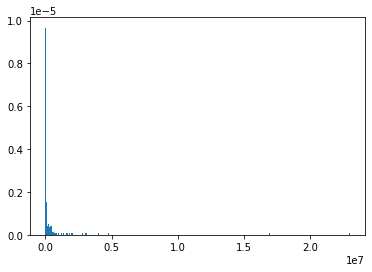

In [22]:
plt.hist(df['Mean GDP'], bins='auto', density=True)
plt.show()

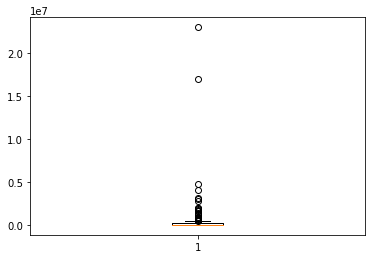

In [23]:
plt.boxplot(df['Mean GDP'])
plt.show()

In [24]:
# Using IQR to identify outliers
Q1 = np.percentile(df['Mean GDP'], 25, interpolation = 'midpoint') 
Q2 = np.percentile(df['Mean GDP'], 50, interpolation = 'midpoint') 
Q3 = np.percentile(df['Mean GDP'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [25]:
# Upper bound outliers
df[df['Mean GDP']> up_lim]

,Country/Territory,UN Region,IMF Estimate,World Bank Estimate,United Nations Estimate,Mean GDP
0,United States,Americas,25035164.0,22996100.0,20893746.0,2.297500e+07
1,China,Asia,18321197.0,17734063.0,14722801.0,1.692602e+07
2,Japan,Asia,4300621.0,4937422.0,5057759.0,4.765267e+06
3,Germany,Europe,4031149.0,4223116.0,3846414.0,4.033560e+06
4,India,Asia,3468566.0,3173398.0,2664749.0,3.102238e+06
5,United Kingdom,Europe,3198470.0,3186860.0,2764198.0,3.049843e+06
6,France,Europe,2778090.0,2937473.0,2630318.0,2.781960e+06
7,Canada,Americas,2200352.0,1990762.0,1644037.0,1.945050e+06
8,Russia,Europe,2133092.0,1775800.0,1483498.0,1.797463e+06
9,Italy,Europe,1996934.0,2099880.0,1888709.0,1.995174e+06


In [26]:
# Lower bound outliers
df[df['Mean GDP']< low_lim]

,Country/Territory,UN Region,IMF Estimate,World Bank Estimate,United Nations Estimate,Mean GDP


In [27]:
# I wanted to see what this feature looked like with log transformation

# Log transformation
df["Log Mean GDP"] = df["Mean GDP"].map(lambda i: np.log(i) if i > 0 else 0)

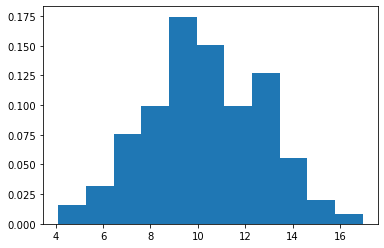

In [28]:
plt.hist(df['Log Mean GDP'], bins='auto', density=True)
plt.show()

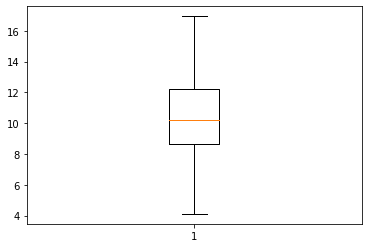

In [29]:
plt.boxplot(df['Log Mean GDP'])
plt.show()

***Ethical Issues to Consider:*** When I delete the year from the GDP estimate, I am making the assumption the GDI in 2019 would be relevant to GDP in 2020 or 2021. I am also making the assumption that GDP does not change very much within one or two years. When I take the mean of the GDPs, this is also potentially an ethical issue because these estimates are taken from different organizations of various credentials, and some of this data could be misrepresentative of the countries that supplied the corresponding data.

## Final Data

In [30]:
df

,Country/Territory,UN Region,IMF Estimate,World Bank Estimate,United Nations Estimate,Mean GDP,Log Mean GDP
0,United States,Americas,25035164.0,22996100.0,20893746.0,2.297500e+07,16.949917
1,China,Asia,18321197.0,17734063.0,14722801.0,1.692602e+07,16.644363
2,Japan,Asia,4300621.0,4937422.0,5057759.0,4.765267e+06,15.376864
3,Germany,Europe,4031149.0,4223116.0,3846414.0,4.033560e+06,15.210160
4,India,Asia,3468566.0,3173398.0,2664749.0,3.102238e+06,14.947634
...,...,...,...,...,...,...,...
211,Palau,Oceania,226.0,258.0,264.0,2.493333e+02,5.518791
212,Kiribati,Oceania,207.0,181.0,181.0,1.896667e+02,5.245268
213,Nauru,Oceania,134.0,133.0,135.0,1.340000e+02,4.897840
214,Montserrat,Americas,NaN,NaN,68.0,6.800000e+01,4.219508
